# Exploratory Data Analysis
----



### Lighthouse Labs, Midterm Project Project - Predicting Flight Delays.

##### January 13, 2023. Terre Leung, Tetiana Fesenko, and Jamie Dormaar

---

_Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA._


_We shouldn't limit our EDA to these 10 questions. Let's be creative :)._

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

from scipy import stats

import warnings
warnings.filterwarnings('ignore')



In [4]:
# SAVE yourself a session timestamp if you want to help keep your files organized
# user = 'Jamie_' # option with leading name           'Jamie_Jan01_1704'
user = ''       # option without leading name              'Jan01_1704'
# session = dt.now().time().strftime(f'{user}%b%d_%H%M')   # 'Jan01_1704'
# session = dt.now().time().strftime(f'{user}%b%-d_%H%M')  # 'Jan1_1708'
session = dt.now().time().strftime(f'{user}%a_%H%M')     # 'Mon_1710'
# session = ''

In [5]:
# Load data tables:
flights_initial_500000_records    = pd.read_csv('../data/flights_initial_500000_records.csv', delimiter= ',')
flights_delay_dates_all_records   = pd.read_csv('../data/flights_delay_dates_all_records.csv', delimiter= ',')
flights_random_100000_records     = pd.read_csv('../data/flights_random_100000_records.csv', delimiter= ',')
flights_test_all_records          = pd.read_csv('../data/flights_test_all_records.csv', delimiter= ',')
fuel_consumption_all_records      = pd.read_csv('../data/fuel_consumption_all_records.csv', delimiter= ',')
passengers_initial_300000_records = pd.read_csv('../data/passengers_initial_300000_records.csv', delimiter= ',')
flights_usa = pd.read_csv('../data/usa_flights2.csv', delimiter= ',')

In [4]:
# Save working copies of the data:
df_fl_init    = flights_initial_500000_records.copy()
df_fl_delays  = flights_delay_dates_all_records.copy()
df_fl_smpl1   = flights_random_100000_records.copy()
df_fl_test    = flights_test_all_records.copy()
df_fc         = fuel_consumption_all_records.copy()
df_pa_init    = passengers_initial_300000_records.copy()

In [5]:

# First look at tables:
# flights_initial_500000_records
print(f'\nflights_initial_500000_records.shape: {flights_initial_500000_records.shape}')
display(flights_initial_500000_records.head())

# flights_delay_dates_all_records
print(f'\nflights_delay_dates_all_records.shape: {flights_delay_dates_all_records.shape}')
display(flights_delay_dates_all_records.head())

# flights_random_100000_records
print(f'\nflights_random_100000_records.shape: {flights_random_100000_records.shape}')
display(flights_random_100000_records.head())

# flights_test_all_records
print(f'\nflights_test_all_records.shape: {flights_test_all_records.shape}')
display(flights_test_all_records.head())

# fuel_consumption_all_records
print(f'\nfuel_consumption_all_records.shape: {fuel_consumption_all_records.shape}')
display(fuel_consumption_all_records.head())

# passengers_initial_300000_records
print(f'\npassengers_initial_300000_records.shape: {passengers_initial_300000_records.shape}')
display(passengers_initial_300000_records.head())



flights_initial_500000_records.shape: (500000, 41)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-04-08,AA,AA,AA,2729,AA,N952NN,2729,11057,CLT,...,1,930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-08,AA,AA,AA,2730,AA,N908AA,2730,12889,LAS,...,1,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-08,AA,AA,AA,2731,AA,N900UW,2731,11292,DEN,...,1,641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-08,AA,AA,AA,2733,AA,N992AU,2733,12953,LGA,...,1,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-08,AA,AA,AA,2734,AA,N864NN,2734,11057,CLT,...,1,930,0.0,0.0,17.0,0.0,0.0,NaN,NaN,NaN



flights_delay_dates_all_records.shape: (15927485, 2)


,fl_date,arr_delay
0,2019-09-07,-37.0
1,2019-09-07,-20.0
2,2019-09-07,40.0
3,2019-09-07,-20.0
4,2019-09-07,-8.0



flights_random_100000_records.shape: (100000, 42)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-10-05,WN,WN,WN,179,WN,N8312C,179,12953,LGA,...,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-05,WN,WN,WN,1106,WN,N219WN,1106,12953,LGA,...,725,10.0,0.0,3.0,0.0,28.0,NaN,NaN,NaN,NaN
2,2018-10-05,WN,WN,WN,1579,WN,N8535S,1579,13232,MDW,...,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-05,WN,WN,WN,2136,WN,N436WN,2136,13342,MKE,...,1756,8.0,0.0,0.0,0.0,294.0,NaN,NaN,NaN,NaN
4,2018-10-05,WN,WN,WN,2423,WN,N221WN,2423,14057,PDX,...,543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



flights_test_all_records.shape: (660556, 20)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01 00:00:00,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01 00:00:00,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01 00:00:00,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01 00:00:00,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01 00:00:00,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333



fuel_consumption_all_records.shape: (3035, 25)


,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016



passengers_initial_300000_records.shape: (300000, 37)


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,month,year,distance_group,class
0,3,3,3600,18,0,210,41,81,166,160,...,"Olga Bay, AK",US,United States,0,40,4,10,2019,1,F
1,3,3,3000,15,3,24,0,39,67,61,...,"Old Harbor, AK",US,United States,0,79,3,10,2019,1,F
2,3,3,3600,18,1,0,0,93,167,161,...,"Kodiak Island, AK",US,United States,0,40,4,10,2019,1,F
3,3,3,3600,18,4,175,86,14,38,32,...,"Seal Bay, AK",US,United States,0,40,4,10,2019,1,F
4,3,3,3600,18,0,209,41,10,32,26,...,"Lazy Bay, AK",US,United States,0,40,4,10,2019,1,F


In [6]:
df_fl_init.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              500000 non-null  object 
 1   mkt_unique_carrier   500000 non-null  object 
 2   branded_code_share   500000 non-null  object 
 3   mkt_carrier          500000 non-null  object 
 4   mkt_carrier_fl_num   500000 non-null  int64  
 5   op_unique_carrier    500000 non-null  object 
 6   tail_num             499495 non-null  object 
 7   op_carrier_fl_num    500000 non-null  int64  
 8   origin_airport_id    500000 non-null  int64  
 9   origin               500000 non-null  object 
 10  origin_city_name     500000 non-null  object 
 11  dest_airport_id      500000 non-null  int64  
 12  dest                 500000 non-null  object 
 13  dest_city_name       500000 non-null  object 
 14  crs_dep_time         500000 non-null  int64  
 15  dep_time         

##### NOTE: Missing Data content for each of the four data tables.


In [7]:
# Check for nulls:
# flights Table percent Null content:
df_fl_init_nulls = df_fl_init.isnull().sum().sort_values(ascending= False)
percent = (df_fl_init.isnull().sum()/df_fl_init.isnull().count()).sort_values(ascending = False)
df_fl_init_missing_data = pd.concat(
    [df_fl_init_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nflights_missing_data.head(20)')
display(df_fl_init_missing_data.head(20))

# flights_test Table percent Null content:
df_fl_test_nulls = df_fl_test.isnull().sum().sort_values(ascending= False)
percent = (df_fl_test.isnull().sum()/df_fl_test.isnull().count()).sort_values(ascending = False)
df_fl_test_missing_data = pd.concat(
    [df_fl_test_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nflights_test_missing_data.head(20)')
display(df_fl_test_missing_data.head(20))

# fuel_consumption Table percent Null content:
df_fc_nulls = df_fc.isnull().sum().sort_values(ascending= False)
percent = (df_fc.isnull().sum()/df_fc.isnull().count()).sort_values(ascending = False)
df_fc_missing_data = pd.concat(
    [df_fc_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nfuel_consumption_missing_data.head(20)')
display(df_fc_missing_data.head(20))

# passengers Table percent Null content:
df_pa_init_nulls = df_pa_init.isnull().sum().sort_values(ascending= False)
percent = (df_pa_init.isnull().sum()/df_pa_init.isnull().count()).sort_values(ascending = False)
df_pa_init_missing_data = pd.concat(
    [df_pa_init_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\npassengers_missing_data.head(20)')
display(df_pa_init_missing_data.head(20))



flights_missing_data.head(20)


,Total,Percent
longest_add_gtime,497206,0.994412
total_add_gtime,497206,0.994412
first_dep_time,497206,0.994412
cancellation_code,494796,0.989592
late_aircraft_delay,418264,0.836528
security_delay,418264,0.836528
nas_delay,418264,0.836528
weather_delay,418264,0.836528
carrier_delay,418264,0.836528
air_time,6683,0.013366



flights_test_missing_data.head(20)


,Total,Percent
tail_num,1499,0.002269
fl_date,0,0.000000
dest_airport_id,0,0.000000
flights,0,0.000000
crs_elapsed_time,0,0.000000
dup,0,0.000000
crs_arr_time,0,0.000000
crs_dep_time,0,0.000000
dest_city_name,0,0.000000
dest,0,0.000000



fuel_consumption_missing_data.head(20)


,Total,Percent
total_gallons,6,0.001977
tdomt_gallons,3,0.000988
slat_gallons,2,0.000659
slat_cost,1,0.000329
spac_cost,1,0.000329
satl_cost,1,0.000329
tint_gallons,1,0.000329
airline_id,1,0.000329
ts_gallons,1,0.000329
sint_gallons,1,0.000329



passengers_missing_data.head(20)


,Total,Percent
departures_scheduled,0,0.0
origin_city_market_id,0,0.0
origin_city_name,0,0.0
origin_country,0,0.0
origin_country_name,0,0.0
dest_airport_id,0,0.0
dest_city_market_id,0,0.0
dest,0,0.0
dest_city_name,0,0.0
dest_country,0,0.0


##### NOTE: Differences between flights, and flights_test table data:

In [8]:
flights_columns = df_fl_init.columns
flights_columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime'],
      dtype='object')

In [9]:
flights_test_columns = df_fl_test.columns
flights_test_columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance'],
      dtype='object')

In [10]:
fl_test_exclusion = df_fl_init[df_fl_init.columns[~df_fl_init.columns.isin([flights_test_columns])]]
fl_test_exclusion.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-04-08,AA,AA,AA,2729,AA,N952NN,2729,11057,CLT,...,1,930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-08,AA,AA,AA,2730,AA,N908AA,2730,12889,LAS,...,1,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-08,AA,AA,AA,2731,AA,N900UW,2731,11292,DEN,...,1,641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-08,AA,AA,AA,2733,AA,N992AU,2733,12953,LGA,...,1,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-08,AA,AA,AA,2734,AA,N864NN,2734,11057,CLT,...,1,930,0.0,0.0,17.0,0.0,0.0,NaN,NaN,NaN


##### ANALYZE: Arrival delay details in the flights table:


#### **Task 1**: 

1. Test the hypothesis that the delay is from Normal distribution. 
1. And, that the **mean** of the arrival delays is 0. 
1. Be careful about the outliers.

>##### TASK 1.1: Test the hypothesis that the delay is from Normal distribution. 

In [11]:
df_fl_init[['arr_delay']].value_counts().sort_values(ascending=False).head(20)

arr_delay
-10.0        15493
-9.0         15347
-11.0        15288
-8.0         15192
-12.0        15104
-13.0        14783
-7.0         14669
-6.0         14491
-14.0        13868
-5.0         13631
-15.0        13439
-4.0         12762
-16.0        12496
-3.0         12024
-17.0        11595
-2.0         11377
-18.0        10783
-1.0         10736
 0.0          9848
-19.0         9819
dtype: int64

In [12]:
df_fl_init['arr_delay'].describe()

count    493580.000000
mean          2.422061
std          41.391574
min         -77.000000
25%         -15.000000
50%          -6.000000
75%           5.000000
max        1685.000000
Name: arr_delay, dtype: float64

The `stats` package from the `scipy` module will test the Null hypothesis that the data is normally distributed.
If the resulting p value is > than 0.05 we can assume the data is distributed normally with high statistical probability.

In [13]:
# from scipy import stats
stat, p = stats.shapiro(df_fl_init['arr_delay'])
print('%0.15f' % p, stat)

1.000000000000000 nan


The statistical calculation above printed the following warning:
```
UserWarning: p-value may not be accurate for N > 5000.
```
Smaller samples taken to correct for this inaccuracy:

In [14]:
# Sample a subset:
x = df_fl_init.sample(1000)
len(x)

1000

In [15]:
# Rerun Shapiro Wilk Normality Test:
stat, p = stats.shapiro(x['arr_delay'])
print('%0.15f' % p, stat)

1.000000000000000 nan


The data appears to indeed be normally distributed.

>##### TASK 1.3: Managing outliers.

##### VISUALIZE: Arrival delay distribution, and manage outliers:

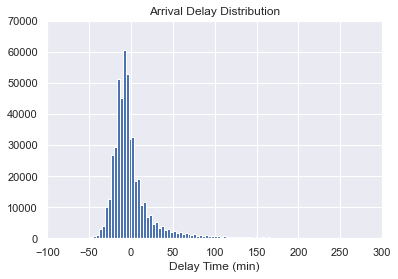

In [16]:
plt.hist(df_fl_init['arr_delay'], bins=500)


plt.xlabel('Delay Time (min)')
plt.title('Arrival Delay Distribution')
plt.xlim(-100, 300)
plt.ylim(0, 70000)

plt.savefig(f'../Images/Arrival_delay_distn_{session}.png')
plt.show()


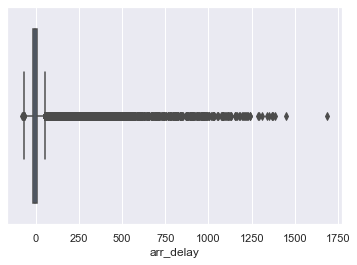

In [17]:
# Outlier detection:
sns.boxplot(data= df_fl_init, x='arr_delay', whis= 2.5)

plt.savefig(f'../Images/Arrival_delay_outliers_boxplot_{session}.png')


Manually chosen outlier range limits:

In [18]:
# # Define and remove the outliers by a chosen parameter:
# max_delay = 100
# outliers    = df_fl_init[df_fl_init['arr_delay'] > max_delay]
# df_fl_clean = df_fl_init[df_fl_init['arr_delay'] < max_delay]

or using the standard 1.5 * IQR:

In [19]:
# Instantiate the Arrival Delays:
delays = df_fl_init['arr_delay']

# Define the quantiles of the delay distribution:
Q1 = delays.quantile(0.25)
Q3 = delays.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
min_threshold = (Q1 - 1.5 * IQR)
max_threshold = (Q3 + 1.5 * IQR)

In [20]:
df_fl_clean = df_fl_init[~((delays < min_threshold)|(delays > max_threshold))]
df_fl_clean.shape

(457270, 41)

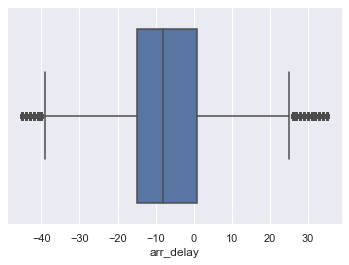

In [21]:
sns.boxplot(x=df_fl_clean['arr_delay'])

#SAVE boxplot of clean delay distribution:
plt.savefig(f'../Images/Arrival_delay_boxplot_{session}.png')

In [22]:
# fig, ax1 = plt.subplots()

# ax1 = fl_df_clean.plot()
# ax2 = fl_df.plot()

# ax1.hist([y1, y2])
# ax1.set_xlim(-10,10)
# fig, (ax1, ax2) = plt.subplots(1, 2)


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [23]:
df_fl_clean[['fl_date']] = df_fl_clean[['fl_date']].apply(pd.to_datetime)

In [24]:
df_fl_clean['year'] = df_fl_clean['fl_date'].dt.year
df_fl_clean['month'] = df_fl_clean['fl_date'].dt.month

In [25]:
print(df_fl_clean[['year', 'month', 'fl_date']].dtypes)
display(df_fl_clean[['year', 'month', 'fl_date']].head())

year                int64
month               int64
fl_date    datetime64[ns]
dtype: object


,year,month,fl_date
0,2018,4,2018-04-08
1,2018,4,2018-04-08
2,2018,4,2018-04-08
3,2018,4,2018-04-08
4,2018,4,2018-04-08


In [26]:
df_fl_clean[['month', 'year', 'arr_delay']].groupby(['year', 'month']).describe()

arr_delay                                                 
               count      mean        std   min   25%  50%  75%   max
year month                                                           
2018 4      437744.0 -6.226893  13.887766 -45.0 -15.0 -8.0  1.0  35.0
     7       13106.0 -6.492675  13.790507 -45.0 -15.0 -8.0  1.0  35.0

In [27]:
# test_dates = pd.read_csv('../../../../Desktop/flights_arr_delay_all_dates.csv')
# test_dates.head()

FileNotFoundError: [Errno 2] No such file or directory: '../../../../Desktop/flights_arr_delay_all_dates.csv'

In [ ]:
test_dates[['fl_date']] = test_dates[['fl_date']].apply(pd.to_datetime)

In [ ]:
test_dates['month'] = test_dates['fl_date'].dt.month
test_dates['year'] = test_dates['fl_date'].dt.year

In [ ]:
df_delays_2018 = test_dates[test_dates['year']==2018]
df_delays_2019 = test_dates[test_dates['year']==2019]

In [ ]:
df_delays_2018.groupby(['month']).agg({'arr_delay': np.mean}).sort_values('arr_delay', ascending=False)
# df_delays_2018.groupby(['year', 'month']).agg(({'arr_delay': np.median}))

In [ ]:
df_delays_2019.groupby('month').agg({'arr_delay': np.mean}).sort_values('arr_delay', ascending=False)
# df_delays_2019.groupby(['year', 'month']).agg(({'arr_delay': np.median}))

In [ ]:
test_dates.groupby(['year', 'month']).describe()

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

['Denver,', 'CO']

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [6]:
flights_usa[['fl_date']] = flights_usa[['fl_date']].apply(pd.to_datetime)
flights_usa['fl_date']

0         2018-01-22
1         2018-01-22
2         2018-01-22
3         2018-01-22
4         2018-01-22
             ...    
1567617   2018-01-22
1567618   2018-01-22
1567619   2018-01-22
1567620   2018-01-22
1567621   2018-01-22
Name: fl_date, Length: 1567622, dtype: datetime64[ns]

In [8]:
flights_usa['year'] = flights_usa['fl_date'].dt.year
flights_usa['month'] = flights_usa['fl_date'].dt.month

In [10]:
#See the distributions
flights_usa[['year', 'month']].value_counts().sort_index(ascending=False)

year  month
2019  12       67473
      11       65095
      10       68491
      9        65006
      8        70726
      7        70191
      6        68116
      5        68471
      4        65462
      3        67862
      2        56530
      1        61876
2018  12       64490
      11       62954
      10       66652
      9        62843
      8        68740
      7        68827
      6        66920
      5        66074
      4        63949
      3        64855
      2        55830
      1        60189
dtype: int64

In [12]:
flights_usa['state'] = flights_usa['origin_city_name'].str[-2:]
flights_usa['late_arr'] = (flights_usa['arr_delay'] > 0).astype(int)
flights_usa['late_dep'] = (flights_usa['dep_delay'] > 0).astype(int)
flights_usa

,fl_date,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,air_time,crs_elapsed_time,actual_elapsed_time,distance,year,month,state,late_arr,late_dep
0,2018-01-22,"Dallas/Fort Worth, TX","Orlando, FL",1845,-5.0,2229.0,1.0,117.0,158,164.0,985,2018,1,TX,1,0
1,2018-01-22,"Dallas/Fort Worth, TX","Baltimore, MD",1313,-2.0,1651.0,-16.0,137.0,172,158.0,1217,2018,1,TX,0,0
2,2018-01-22,"Dallas/Fort Worth, TX","Miami, FL",526,-4.0,900.0,-11.0,135.0,161,154.0,1121,2018,1,TX,0,0
3,2018-01-22,"Kansas City, MO","Chicago, IL",1553,-4.0,1801.0,28.0,98.0,96,128.0,403,2018,1,MO,1,0
4,2018-01-22,"Dallas/Fort Worth, TX","St. Louis, MO",1836,-4.0,2015.0,-10.0,76.0,105,99.0,550,2018,1,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567617,2018-01-22,"Hartford, CT","Philadelphia, PA",1305,-5.0,1415.0,-19.0,52.0,84,70.0,196,2018,1,CT,0,0
1567618,2018-01-22,"Chicago, IL","Orlando, FL",1457,-8.0,1845.0,3.0,139.0,157,168.0,1005,2018,1,IL,1,0
1567619,2018-01-22,"Chicago, IL","Minneapolis, MN",2151,-5.0,2318.0,-2.0,59.0,84,87.0,334,2018,1,IL,0,0
1567620,2018-01-22,"Chicago, IL","Pittsburgh, PA",830,-5.0,1105.0,5.0,61.0,85,95.0,413,2018,1,IL,1,0


In [14]:
flights_usa['speed'] = flights_usa['distance']/flights_usa['air_time']
no_dep_delay = flights_usa[flights_usa['late_dep'] == 0]
yes_dep_delay = flights_usa[flights_usa['late_dep'] == 1]

In [16]:
#If there is no departure delay, there is a 15% chance of late arrival
no_dep_delay['late_arr'].mean()

0.15245505306299495

In [17]:
#If there is a departure delay, there is a 73% chance of late arrival
yes_dep_delay['late_arr'].mean()

0.7306584042797868

#### **Task 6**: How many states cover 50% of US air traffic? 

In [18]:
top_8 = flights_usa['state'].value_counts().head(8)
top_8

CA    171552
TX    154073
FL    113839
IL     98147
GA     83351
NY     81020
NC     72233
CO     61526
Name: state, dtype: int64

In [20]:
total_flight = flights_usa['origin_city_name'].count()
total_flight

1567622

In [22]:
#These 8 states cover 53% of the flight
top_8.sum()/total_flight

0.5331266083277729

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [24]:
#Mean of planes speed without departure delay
no_dep_delay['speed'].mean()

6.595703152193902

In [25]:
#Mean of planes speed with departure delay
yes_dep_delay['speed'].mean()

6.757231148937743

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?